In [148]:
import pandas as pd
import collect 
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
import cluster

In [109]:
reload(collect)

<module 'collect' from '/Users/fariszahrah/Documents/IIT/CS579/fariszahrah/a4/collect.py'>

In [139]:
users = pd.read_pickle('./data.pkl')

In [221]:
tweets = pd.read_pickle('./tweets.pkl')
tweets.shape

(8299, 29)

In [211]:
 graph = nx.read_gpickle('./graph.gpickle')  

In [212]:
graph.edges(23137860)

EdgeDataView([(23137860, 12), (23137860, 657863), (23137860, 2730791), (23137860, 5750512), (23137860, 6213582), (23137860, 14444941), (23137860, 15935591), (23137860, 28582680), (23137860, 35749949), (23137860, 50393960), (23137860, 101580574), (23137860, 176758255), (23137860, 571202103), (23137860, 1051053836), (23137860, 3719087053), (23137860, 902839045356744704)])

In [213]:
import community
import pickle

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


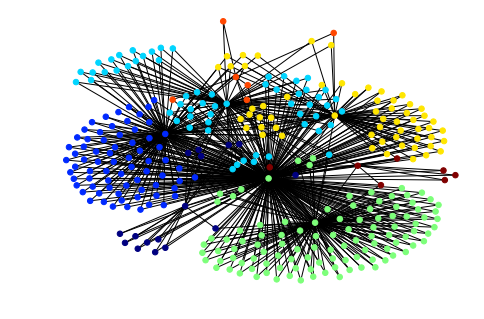

In [452]:
part = community.best_partition(graph)
values = [part.get(node) for node in graph.nodes()]
nx.draw_spring(graph, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.savefig('Network_good.png', pad_inches=4)

In [450]:
s=0
for i in c:
    s += c[i]/len(c)

In [451]:
s

46.28571428571428

In [196]:
t2_df = pd.read_pickle('./main_user_tweets.pkl')

In [344]:
t2_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Thu Apr 25 05:04:08 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1121278698425069568,1121278698425069568,...,NaN,NaN,NaN,76,False,{'created_at': 'Wed Apr 24 20:07:40 +0000 2019...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dannyryan: v0.6.0 — Spring Cleaning — rele...,False,"{'id': 295218901, 'id_str': '295218901'}"
1,None,None,Thu Apr 25 05:03:40 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,8,False,None,1121278578937815040,1121278578937815040,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@drakefjustin NOT simple!\n\nThough compared t...,False,"{'id': 295218901, 'id_str': '295218901'}"
2,None,None,Thu Apr 25 04:54:21 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1121276235236220928,1121276235236220928,...,NaN,NaN,NaN,70,False,{'created_at': 'Wed Apr 24 10:43:07 +0000 2019...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @drakefjustin: Filecoin and Ethereum 2.0 co...,False,"{'id': 295218901, 'id_str': '295218901'}"
3,None,None,Wed Apr 24 17:28:04 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,6,False,None,1121103525843480577,1121103525843480577,...,NaN,NaN,NaN,0,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@bitcoinization @Maxahoy Just use buttcoin's. ...,False,"{'id': 295218901, 'id_str': '295218901'}"
4,None,None,Wed Apr 24 17:05:02 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,22,False,None,1121097728455512070,1121097728455512070,...,NaN,NaN,NaN,0,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@bitcoinization July-Aug 2014.,False,"{'id': 295218901, 'id_str': '295218901'}"


In [205]:
with open('partition.pickle', 'rb') as handle:
    f = pickle.load(handle)

<b>NOW WE TACKLE CLASSIFICATION</b>


first i will classify a sample of the tweets i collected, and label them


In [233]:
sample = tweets.sample(frac=1/20,random_state=3)

In [236]:
sample.to_excel('train_tweets.xlsx')

Trading => 0
Technology => 1
N/A => 2

In [421]:
train = pd.read_excel('train_tweets.xlsx')
target = train['Target']
train.drop(['Target','contributors','favorited','id','id_str','retweeted','coordinates','created_at','geo'], inplace=True, axis=1)

In [279]:
train['text_f']= [0 for i in range(train.shape[0])]


In [328]:
terms = set()
for row in range(train.shape[0]):
    terms |= set(nltk.word_tokenize(train.iloc[row]['text']))
    #print(train.iloc[row]['text_f'] train.iloc[row]['text'])

In [395]:
t = [i for i in train['text'].tolist()]
t1 = [i for i in t2_df['text'].tolist()]

In [396]:
t_sum = t + t1
len(t_sum), len(t), len(t1)

(6778, 415, 6363)

In [414]:
from sklearn.feature_extraction.text import *
tfidf_vectorizer = TfidfVectorizer(min_df=2)
X_tfidf = tfidf_vectorizer.fit_transform(t_sum)


In [433]:
X_tfidf.shape

(6778, 6135)

In [415]:
train_df = pd.DataFrame(X_train_tfidf.todense()).iloc[:415]
test_df  = pd.DataFrame(X_train_tfidf.todense()).iloc[416:]

In [416]:
from sklearn.ensemble import RandomForestClassifier  
import sklearn as sk 
import re
import nltk

In [422]:

RF = RandomForestClassifier(n_estimators=1000, max_depth=30, random_state=0).fit(train_df, target)  
predictions = RF.predict(test_df)  



In [423]:
predictions = RF.predict(test_df)  
predictions = predictions.tolist()
zero = 0
one = 0
two = 0
for i in predictions:
    if i == 0:
        zero +=1
    elif i ==1:
        one +=1
    elif i == 2:
        two +=1
        
print(zero,one,two)

915 482 4965


In [427]:
from collections import Counter
c = Counter(predictions)

In [432]:
for i in c:
    print(i, c[i])
    

2 4965
1 482
0 915


In [436]:
dict(c)

{2: 4965, 1: 482, 0: 915}